<center><h1><strong>taudata Analytics</strong></h1></center>
<center><h2><strong><font color="blue">EDA-03: Unsupervised Learning - Pendahuluan Clustering</font></strong></h2></center>
<img alt="" src="images/covers/taudata-cover.jpg" alt="" width="800"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://taudata.blogspot.com/</font></h3></center>
<center><h3><font color="blue">https://www.youtube.com/c/taudataAnalytics</font></h3></center>

In [ ]:
import pandas as pd

# Membaca file Excel
df = pd.read_excel('/content/data_06_mini_challenge.xlsx')

# Menampilkan beberapa baris pertama data
print(df.head())

         ntl  poi_fas_ekonomi  kepadatan_penduduk
0   9.285000                1                9049
1  24.955000               25               12663
2  24.840000               10               11621
3  14.709999                1                8967
4   9.340000                1                7597


In [ ]:
# Importing Modules untuk Notebook ini
!pip install umap-learn
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)
random_state = 99

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'tau_unsup'

<img src="images/clustering_Quotes.png" />

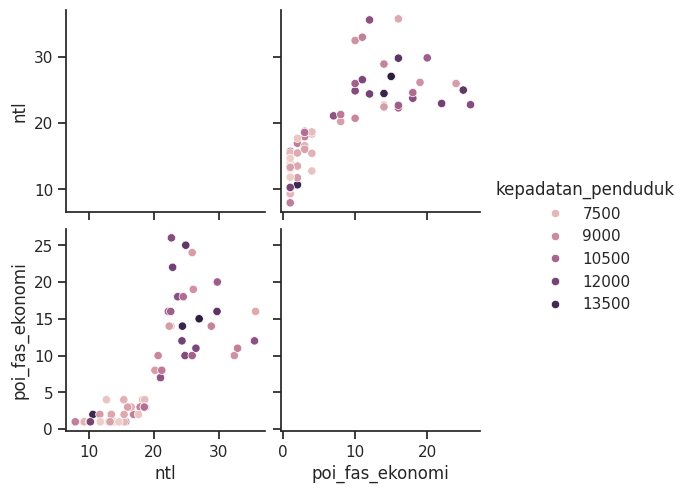

In [ ]:
g = sns.pairplot(df, hue="kepadatan_penduduk")

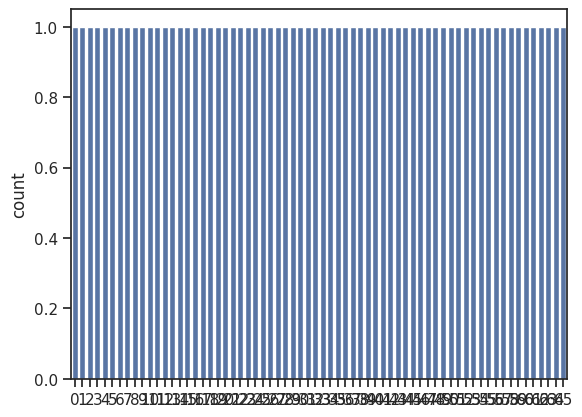

In [ ]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001,
                    random_state = 99)
km.fit(df)
# Hasil clusteringnya
C_km = km.predict(df)
p= sns.countplot(C_km)

In [ ]:
C_km

array([1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1],
      dtype=int32)

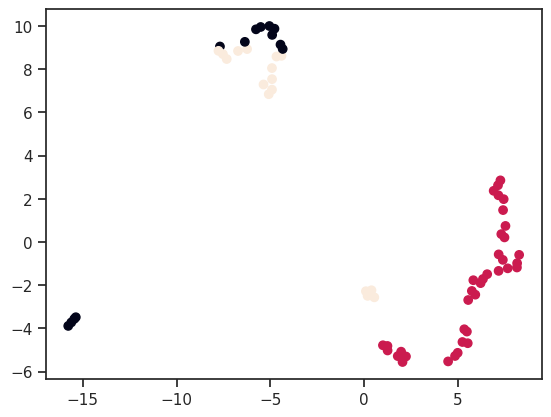

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

# Apa beda label ini dengan klasifikasi ("labels")?

In [ ]:
C_km

array([1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1],
      dtype=int32)

In [ ]:
km.inertia_

1124.610295247848

Text(0.5, 1.0, 'Elbow curve')

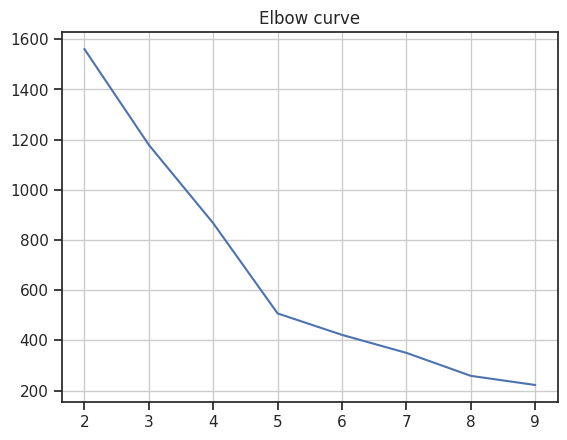

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


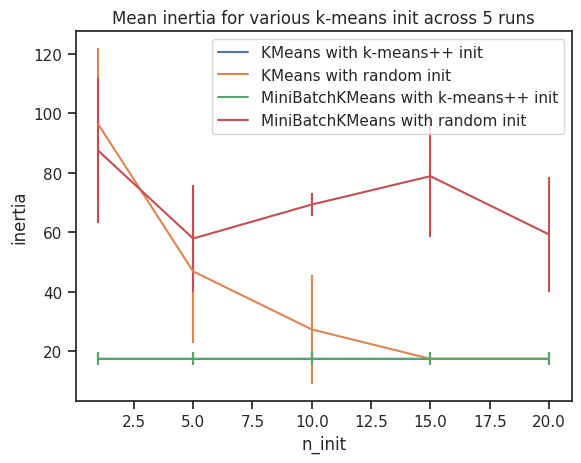

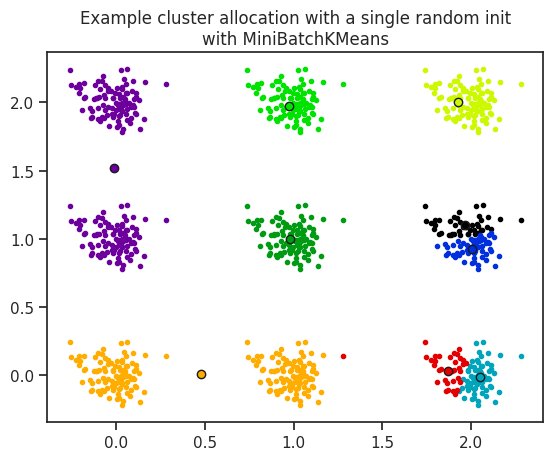

In [ ]:
tau.km_initializations()

array([0, 1, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

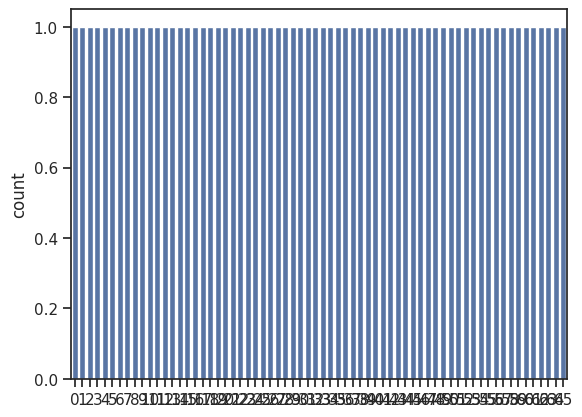

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(C_kmpp)
C_kmpp[:10]

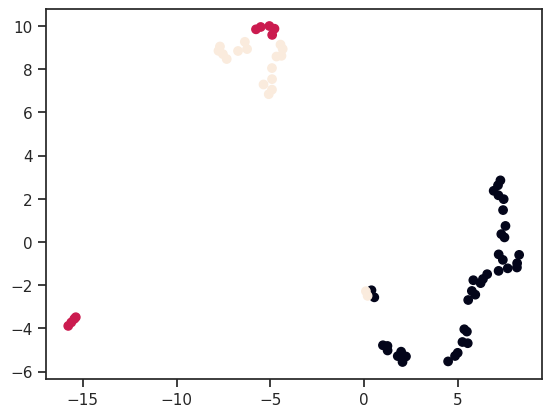

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

array([0, 1, 1, 0, 0, 0, 2, 0, 1, 1], dtype=int32)

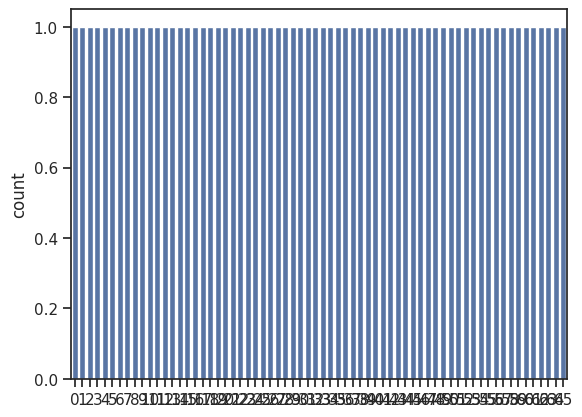

In [ ]:
# MiniBatch k-Means
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, batch_size = 100, random_state = random_state)
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
sns.countplot(C_mbkm)
C_mbkm[:10]

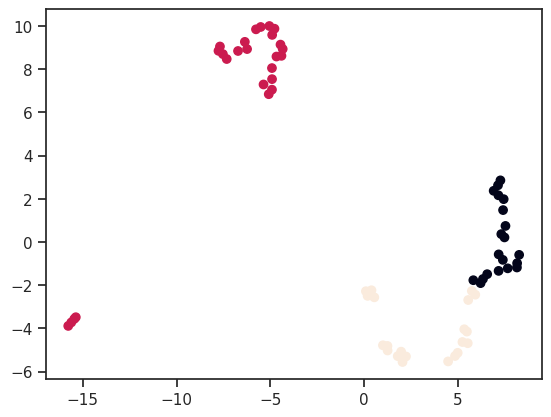

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

# Minibatch k-Means++

array([0, 2, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

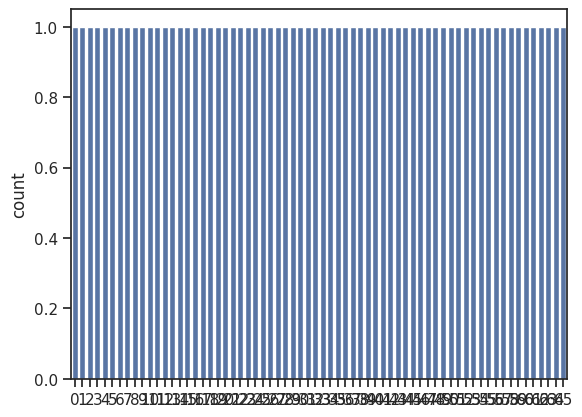

In [ ]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

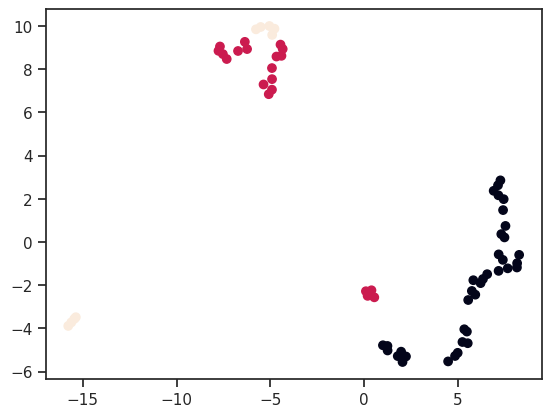

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)
plt.show()


## k_means VS MiniBatch k-Means?

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


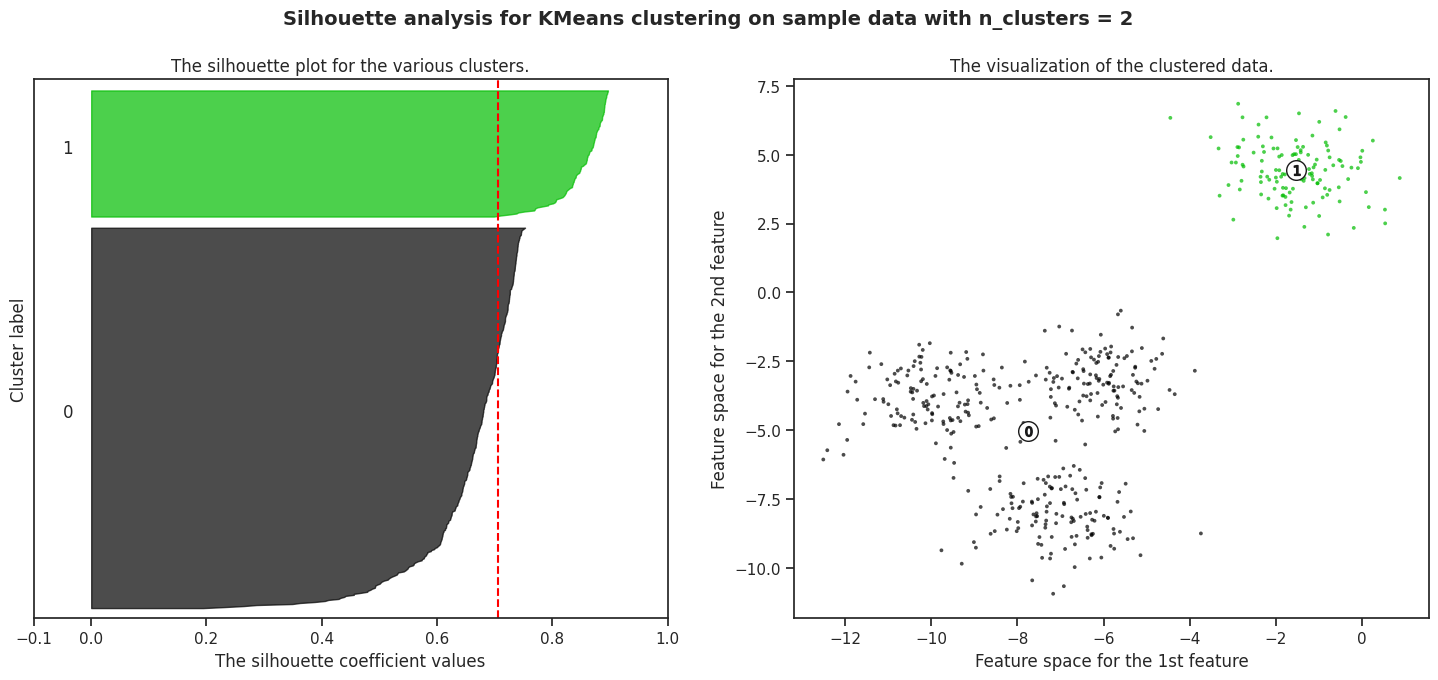

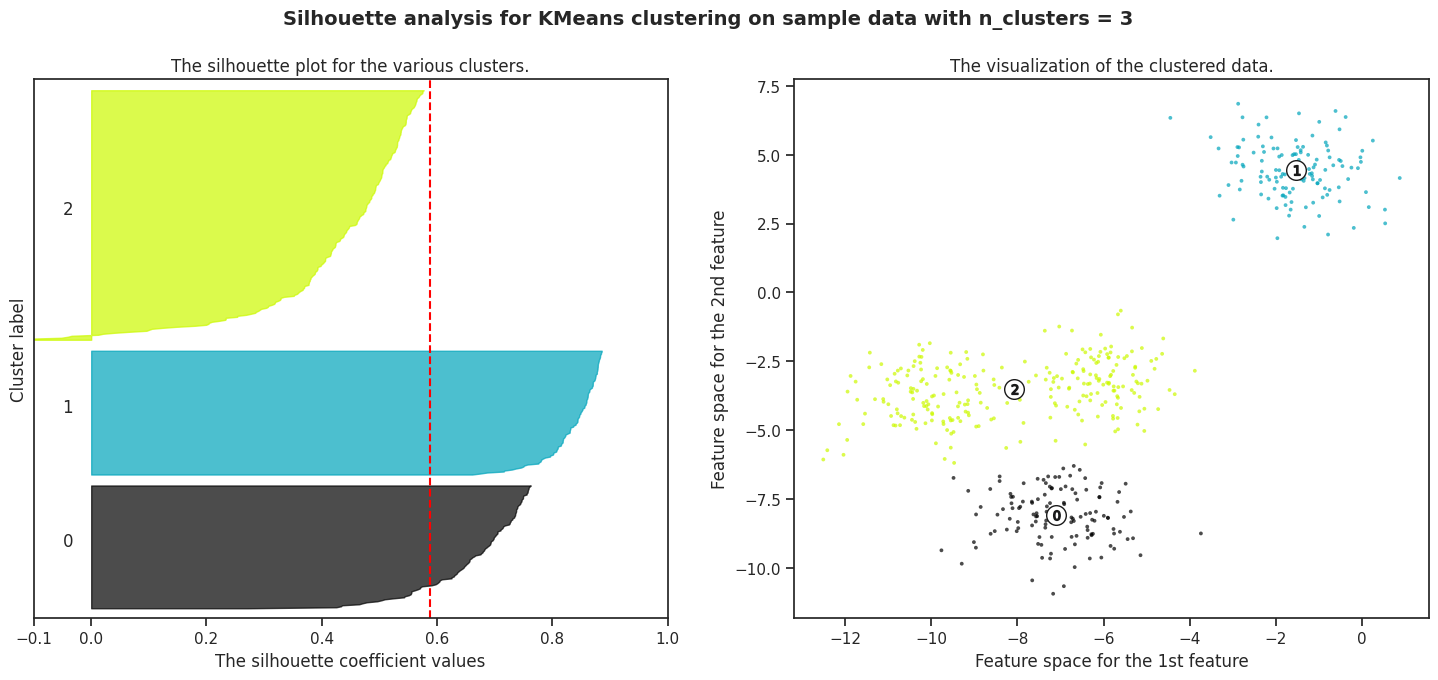

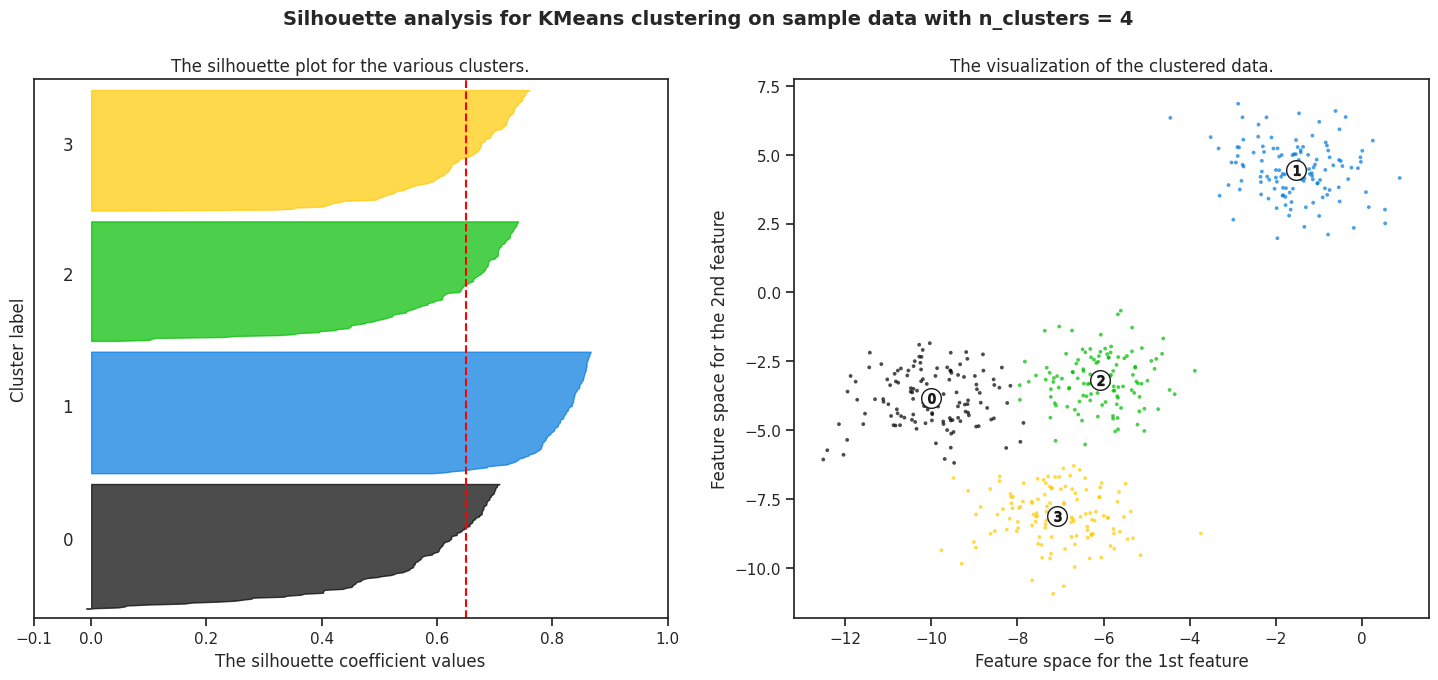

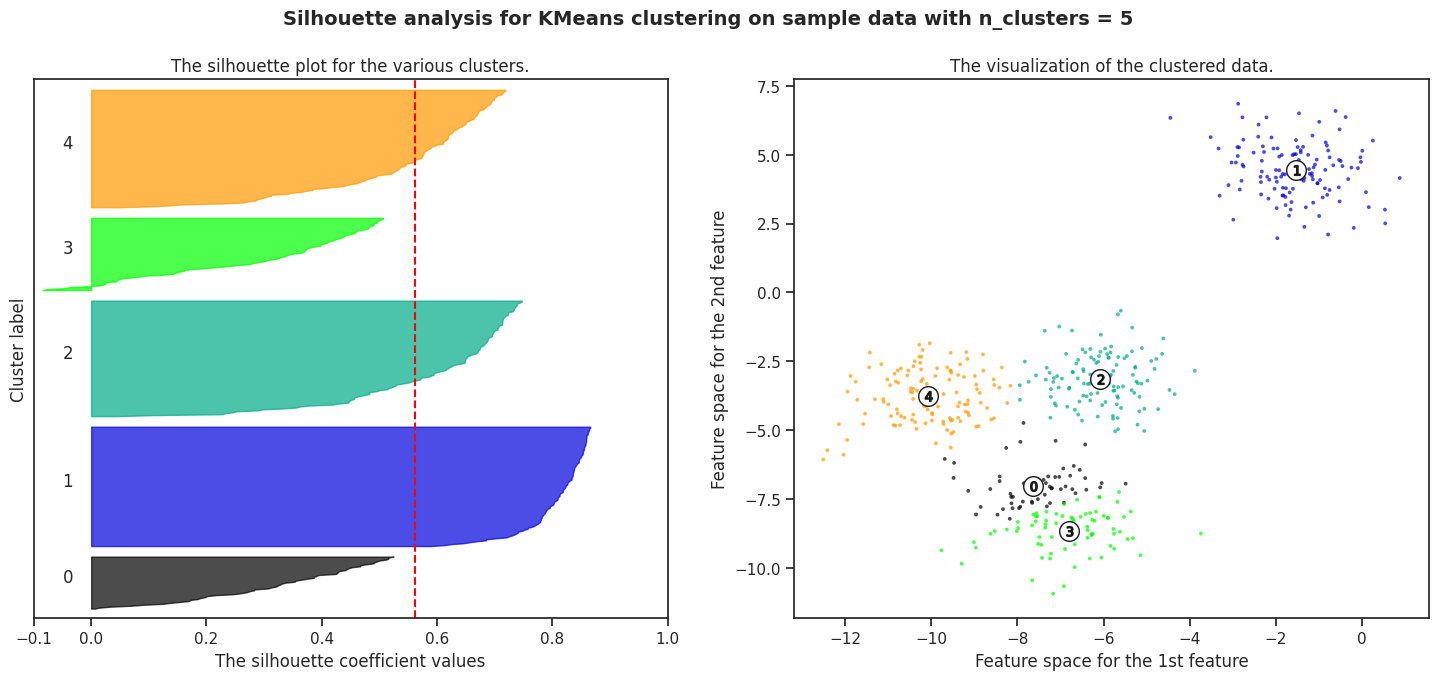

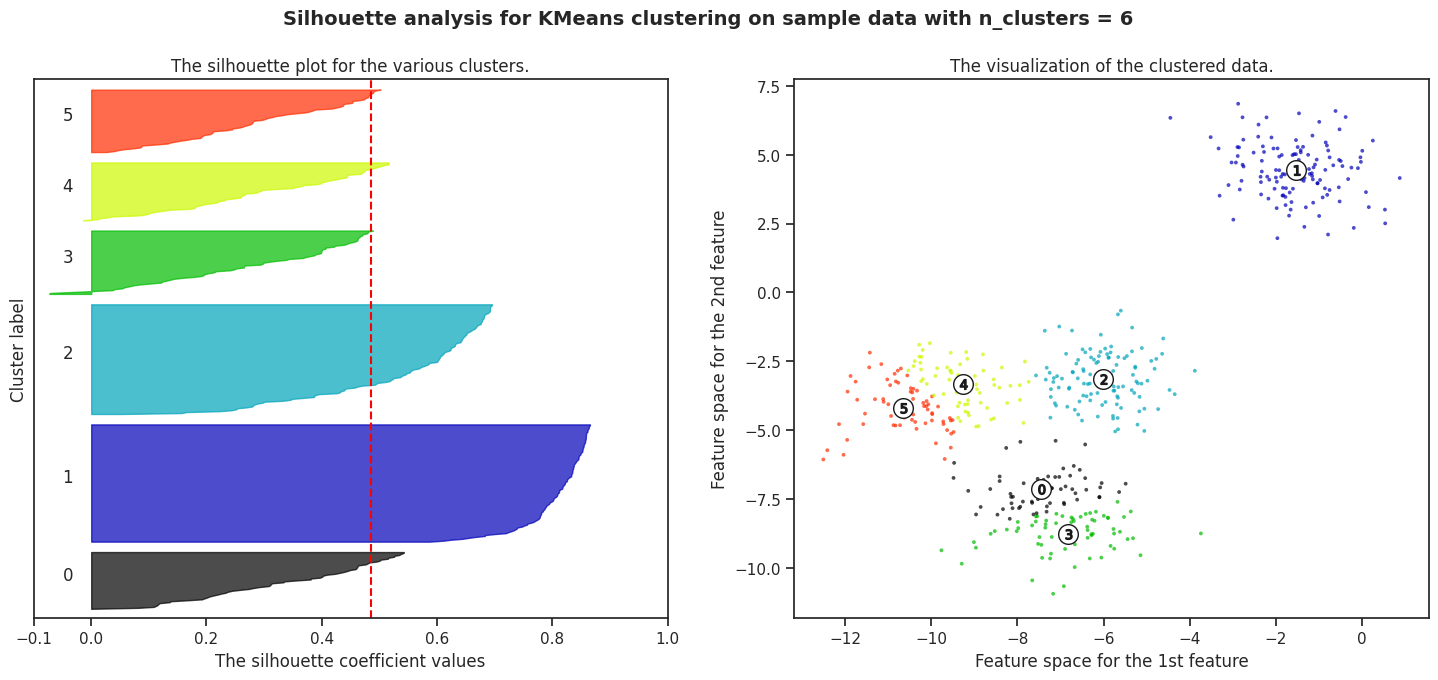

In [ ]:
tau.sil_based_optimal_km()

In [ ]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')
# Bagaimana cara kerja dan interpretasinya?

0.5528190123564102, 0.5528190123564102, 0.5528190123564102, 0.5528190123564102, 

In [ ]:
# Bagaimana dengan evaluasi External?
# "C" adalah ground truth/golden standard
for res in Hasil_Clustering:
    print(purity(C,res), end=', ')

0.7514854021988338, 0.7514854021988338, 0.7514854021988339, 0.7514854021988339, 

In [ ]:
# Evaluasi External NMI
for res in Hasil_Clustering:
    print(NMI(C,res), end=', ')
# untuk F-Score ada juga code dan penjelasannya di blog post di atas

0.7581756800057784, 0.7581756800057784, 0.7581756800057785, 0.7581756800057785, 

## Please read more here:  https://tau-data.id/evaluasi-eksternal/

# Cara menarik kesimpulan dari k-Means: Interpretasi

In [ ]:
kmPP.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

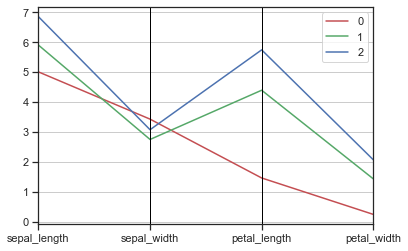

In [ ]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['sepal_length','sepal_width','petal_length','petal_width']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

In [ ]:
kmPP.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# k-Means Best Practices

* Hati-hati faktor skala data ==> Normalisai/Standardized.
* Hati-hati asumsi topologi data di k-means.
* Nope... k-Means tidak bisa untuk data Kategori
* Sangat tidak disarankan untuk data tidak terstruktur berskala besar. Kalau datanya tidak besar cukup ganti jarak euclid dengan similarity Cosine.


# End of Module

<hr />